# The Spark Foundation - Data Science & Business Analytics Internship


# Batch - March 2022

# TASK 7 - Stock Market Prediction using Numerical and Textual Analysis

Stock to analyze and predict SENSEX (S&P BSE SENSEX)

# Objective:
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [9]:
#import libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

In [10]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2020-06-30')
#since our Textual Analysis dataset containing news from Times of India News Headlines is only till 30th June 2020. 
#So we will assume today is 29th June 2020 and tomorrow is 30th June 2020. And we have to predict the stock price ((high+low+close)/3) and closing price of BSE index 
#for tomorrow 30th June 2020.
unseenbse_data = yf.download('^BSESN', start='2020-06-30', end='2020-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
unseenbse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [15]:
unseenbse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [16]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1346 entries, 2015-01-02 to 2020-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1346 non-null   float64
 1   high      1346 non-null   float64
 2   low       1346 non-null   float64
 3   close     1346 non-null   float64
 4   adjclose  1346 non-null   float64
 5   volume    1346 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.6 KB


In [17]:
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2020-06-30 to 2020-07-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2 non-null      float64
 1   high      2 non-null      float64
 2   low       2 non-null      float64
 3   close     2 non-null      float64
 4   adjclose  2 non-null      float64
 5   volume    2 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 112.0 bytes


In [18]:
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [19]:
bse_data.tail()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800
2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [20]:
unseenbse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500
2020-07-01,35009.589844,35467.230469,34927.199219,35414.449219,35414.449219,19400


In [21]:
bse_data.reset_index(inplace=True)

In [22]:
bse_data.rename(columns={'Date': 'date'}, inplace = True)

In [23]:
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [24]:
unseenbse_data.reset_index(inplace=True)

In [25]:
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)

In [26]:
unseenbse_data.head()

,date,open,high,low,close,adjclose,volume
0,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500
1,2020-07-01,35009.589844,35467.230469,34927.199219,35414.449219,35414.449219,19400


In [27]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format = '%Y%m%d')

In [28]:
unseenbse_data['date'] = pd.to_datetime(unseenbse_data['date'], format = '%Y%m%d')

In [29]:
#before moving forward let us calculate first the actual price
unseenbsedata_price = round((unseenbse_data['high'] + unseenbse_data['low'] + unseenbse_data['close'])/ 3, 2)
unseenbsedata_price  #actual price

0    34987.50
1    35269.63
dtype: float64

# Rolling window analysis of time series
Creating 4,16, 52 week moving average of closing price of BSE index

In [30]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

In [31]:
stock_weekmovingavg(4, bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,28256.509570
2015-02-03,29000.140625,28318.228027
2015-02-04,28883.109375,28376.119043
2015-02-05,28850.970703,28470.901465
2015-02-06,28717.910156,28568.008984


<AxesSubplot:xlabel='date'>

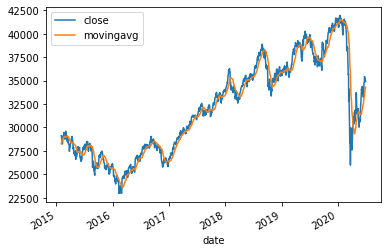

In [32]:
stock_weekmovingavg(4, bse_data).plot()

In [33]:
altdata_fourweek = stock_weekmovingavg(4, bse_data)
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'date'}, inplace=True)

In [34]:
alt.Chart(altdata_fourweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

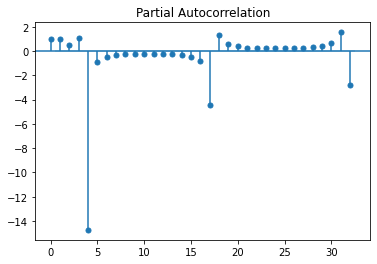

In [35]:
plotfourweek = altdata_fourweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fourweek['date']))) 
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 4 and 32. Since it is less than 0 and more than -1 so 4 and 32 represents a perfect negative correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions (which is not vividly seen in the above plot)

In [36]:
stock_weekmovingavg(16, bse_data).head()

,close,movingavg
date,,
2015-05-05,27440.140625,28447.880933
2015-05-06,26717.369141,28442.283936
2015-05-07,26599.109375,28428.222046
2015-05-08,27105.390625,28423.367651
2015-05-11,27507.300781,28425.824780


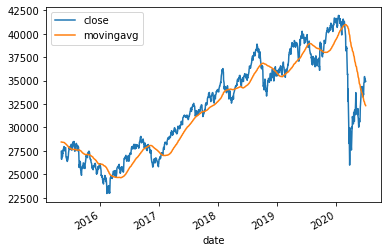

In [37]:
stock_weekmovingavg(16, bse_data).plot()
plt.show()

In [38]:
altdata_sixteenweek = stock_weekmovingavg(16, bse_data)
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'date'}, inplace=True)

In [39]:
alt.Chart(altdata_sixteenweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

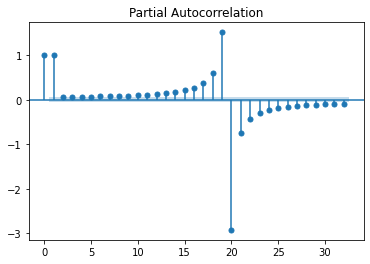

In [40]:
plotsixteenweek = altdata_sixteenweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_sixteenweek['date']))) 
del plotsixteenweek['date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

# In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28. Where 0, 1, 19 represents a perfect positive correlation and 20 represents a perfect negative correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions (which is not vividly seen in the above plot)

In [41]:
stock_weekmovingavg(52, bse_data).head()

,close,movingavg
date,,
2016-01-25,24485.949219,27198.907963
2016-01-27,24492.390625,27185.823535
2016-01-28,24469.570312,27172.939190
2016-01-29,24870.689453,27163.254995
2016-02-01,24824.830078,27155.416031


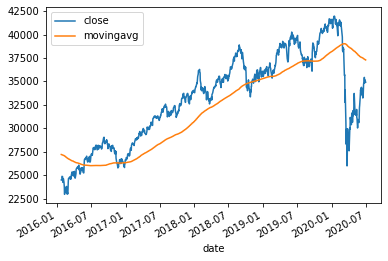

In [42]:
stock_weekmovingavg(52, bse_data).plot()
plt.show()

In [43]:
altdata_fiftytwoweek = stock_weekmovingavg(52, bse_data)
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'date'}, inplace=True)

In [44]:
alt.Chart(altdata_fiftytwoweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

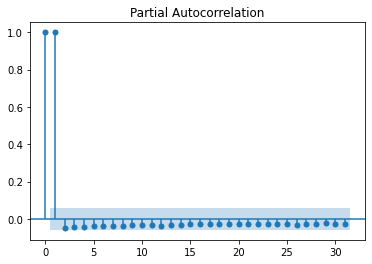

In [45]:
plotfiftytwoweek = altdata_fiftytwoweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfiftytwoweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fiftytwoweek['date']))) 
del plotfiftytwoweek['date']
sm.graphics.tsa.plot_pacf(plotfiftytwoweek.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 1 representing a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions

# Creating a rolling window of size 10 and 50 of the BSE index

In [46]:
def rollingwindows(days, df):
  data = df.filter(['date','open','high','low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  rollingwindows_data = data.rolling(window=days).mean().shift()
  return rollingwindows_data.dropna()

In [47]:
rollingwindows(10, bse_data).head()

,open,high,low,close
date,,,,
2015-01-16,27515.904883,27657.483008,27279.612891,27479.296484
2015-01-19,27569.437891,27681.345898,27322.217969,27502.695508
2015-01-20,27596.578906,27708.302930,27363.268945,27544.664453
2015-01-21,27659.640820,27821.338867,27502.047852,27724.385352
2015-01-22,27845.606836,28011.988867,27703.692969,27922.389258


<AxesSubplot:xlabel='date'>

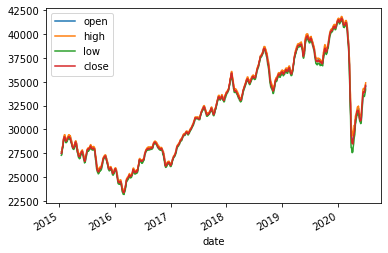

In [48]:
rollingwindows(10, bse_data).plot()

In [49]:
altdata_tendays = rollingwindows(10, bse_data)
altdata_tendays.reset_index(inplace=True)
altdata_tendays.rename(columns={list(altdata_tendays)[0]:'date'}, inplace=True)

In [50]:
alt.Chart(altdata_tendays).mark_point().encode(
    x ='date',
    y = 'close'
)


alt.Chart(...)

In [51]:
rollingwindows(50, bse_data).head()

,open,high,low,close
date,,,,
2015-03-18,28721.847383,28863.956836,28502.767422,28670.602461
2015-03-19,28746.759180,28881.346836,28523.317422,28685.286836
2015-03-20,28763.295000,28899.631836,28535.814414,28697.833828
2015-03-23,28778.719180,28915.340430,28561.266406,28723.306211
2015-03-24,28805.396367,28942.011250,28589.022031,28748.970195


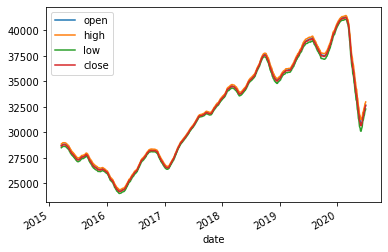

In [52]:
rollingwindows(50, bse_data).plot()
plt.show()

In [53]:
altdata_fiftydays = rollingwindows(50, bse_data)
altdata_fiftydays.reset_index(inplace=True)
altdata_fiftydays.rename(columns={list(altdata_fiftydays)[0]:'date'}, inplace=True)

In [54]:
alt.Chart(altdata_fiftydays).mark_point().encode(
    x='date',
    y='close'
)

alt.Chart(...)

# Creating the dummy time series:
Volume shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [55]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [56]:
boolean_shock(10, bse_data, 'volume')

,percentchg,shock
date,,
2015-01-05,24.324324,1
2015-01-06,53.260870,1
2015-01-07,-13.475177,0
2015-01-08,-32.786885,0
2015-01-09,35.365854,1
...,...,...
2020-06-24,5.555556,0
2020-06-25,-7.518797,0
2020-06-26,0.813008,0


In [57]:
altdata_volpercentchg = boolean_shock(10, bse_data, 'volume')
altdata_volpercentchg.reset_index(inplace=True)
altdata_volpercentchg.rename(columns={list(altdata_volpercentchg)[0]:'date'}, inplace=True)

In [58]:
alt.Chart(altdata_volpercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)


alt.Chart(...)

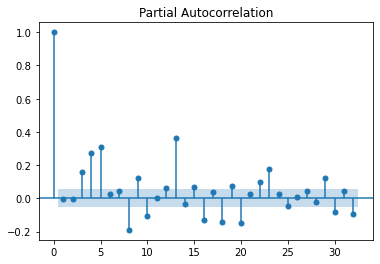

In [59]:
plotvolpercentchg = altdata_volpercentchg.filter(['date', 'percentchg'], axis=1) #df.copy()
plotvolpercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_volpercentchg['date']))) 
del plotvolpercentchg['date']
sm.graphics.tsa.plot_pacf(plotvolpercentchg.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 3, 4, 5, 8, 9. 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 29, 30, 32. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions

In [60]:
boolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-05,-0.163440,0
2015-01-06,-3.070360,0
2015-01-07,-0.291397,0
2015-01-08,1.359742,0
2015-01-09,0.673407,0
...,...,...
2020-06-24,-1.584653,0
2020-06-25,-0.077085,0
2020-06-26,0.944742,0


In [61]:
altdata_closepercentchg2 = boolean_shock(2, bse_data, 'close')
altdata_closepercentchg2.reset_index(inplace=True)
altdata_closepercentchg2.rename(columns={list(altdata_closepercentchg2)[0]:'date'}, inplace=True)

In [62]:
alt.Chart(altdata_closepercentchg2).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

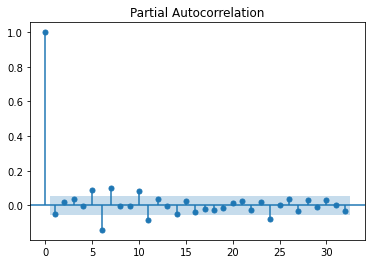

In [63]:
plotclosepercentchg2 = altdata_closepercentchg2.filter(['date', 'percentchg'], axis=1) #df.copy()
plotclosepercentchg2.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg2['date']))) 
del plotclosepercentchg2['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg2.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 5, 6, 7, 10, 11, 24. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions.

In [64]:
boolean_shock(10, bse_data, 'close')

,percentchg,shock
date,,
2015-01-05,-0.163440,0
2015-01-06,-3.070360,0
2015-01-07,-0.291397,0
2015-01-08,1.359742,0
2015-01-09,0.673407,0
...,...,...
2020-06-24,-1.584653,0
2020-06-25,-0.077085,0
2020-06-26,0.944742,0


In [65]:
altdata_closepercentchg10 = boolean_shock(10, bse_data, 'close')
altdata_closepercentchg10.reset_index(inplace=True)
altdata_closepercentchg10.rename(columns={list(altdata_closepercentchg10)[0]:'date'}, inplace=True)

In [66]:
alt.Chart(altdata_closepercentchg10).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

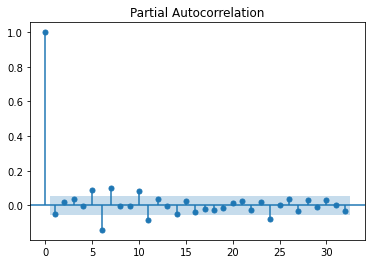

In [67]:
plotclosepercentchg10 = altdata_closepercentchg10.filter(['date', 'percentchg'], axis=1) #df.copy()
plotclosepercentchg10.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg10['date']))) 
del plotclosepercentchg10['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg10.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 5, 6, 7, 10, 11, 24. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions.

# Pricing shock without volume shock

In [68]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  return data

In [69]:
priceboolean_shock(10, bse_data)

,priceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,0
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0
2020-06-26,35112.162760,0


In [70]:
altdata_pricepercentchg = priceboolean_shock(10, bse_data)
altdata_pricepercentchg.reset_index(inplace=True)
altdata_pricepercentchg.rename(columns={list(altdata_pricepercentchg)[0]:'date'}, inplace=True)

In [71]:
alt.Chart(altdata_pricepercentchg).mark_point().encode(
    x='date',
    y='priceavg'
)

alt.Chart(...)

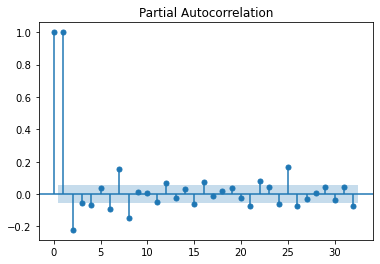

In [72]:
plotpricepercentchg = altdata_pricepercentchg.filter(['date', 'priceavg'], axis=1) #df.copy()
plotpricepercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_pricepercentchg['date']))) 
del plotpricepercentchg['date']
sm.graphics.tsa.plot_pacf(plotpricepercentchg.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 1, 2, 4, 6, 7, 8, 15, 16, 21, 22, 25, 26. And lag values 0, 1 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions

# Creating the reverse dummy time series:
Price shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [73]:
def reverseboolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [74]:
reverseboolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,1
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2020-06-23,1.610168,0
2020-06-24,0.077145,0
2020-06-25,-0.935900,0


In [75]:
altdata_closepercentchg = reverseboolean_shock(2, bse_data, 'close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'}, inplace=True)

In [76]:
alt.Chart(altdata_closepercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

Pricing black swan : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 5%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [77]:
reverseboolean_shock(5, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,0
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2020-06-23,1.610168,0
2020-06-24,0.077145,0
2020-06-25,-0.935900,0


In [78]:
altdata_closepercentchg5 = reverseboolean_shock(5, bse_data, 'close')
altdata_closepercentchg5.reset_index(inplace=True)
altdata_closepercentchg5.rename(columns={list(altdata_closepercentchg5)[0]:'date'}, inplace=True)

In [79]:
alt.Chart(altdata_closepercentchg5).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

Pricing shock without volume shock : Now we will be creating a time series for pricing shock without volume shock based on whether price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [80]:
def pricereverseboolean_shock(percent, df):
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [81]:
pricereverseboolean_shock(2, bse_data)

,reversepriceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,1
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0
2020-06-26,35112.162760,0


In [82]:
altdata_reversepricepercentchg = pricereverseboolean_shock(2, bse_data)
altdata_reversepricepercentchg.reset_index(inplace=True)
altdata_reversepricepercentchg.rename(columns={list(altdata_reversepricepercentchg)[0]:'date'}, inplace=True)

In [83]:
alt.Chart(altdata_reversepricepercentchg).mark_point().encode(
    x='date',
    y='reversepriceavg'
)

alt.Chart(...)

# Textual Analysis of news from Times of India News Headlines

In [85]:
#reading the uploaded csv file and assigning to news variable
news  = pd.read_csv('india-news-headlines.csv')

In [86]:
#getting the overview of all the columns in the news dataset
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [87]:
#finding the total rows and columns of news dataset
news.shape

(3297172, 3)

In [88]:
#first 5 rows content of the dataset
news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [89]:
#converting publish_date column to 
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [90]:
#first 5 rows content of the dataset
news.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [91]:
#last 5 rows content of the dataset
news.tail()

,publish_date,headline_category,headline_text
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,2020-06-30,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [92]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage.
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [93]:
#finding unique values in headline_category
news['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [94]:
#checking all the values count (unique values total count)
news['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
ballot-talk                     7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [95]:
#total unique values count
news['headline_category'].value_counts().count()

1016

In [96]:
#checking all the values count (unique values total count)
news['headline_text'].value_counts()

Sunny Leone HOT photos                                                                              98
Watch top news in one-minute                                                                        90
Official Site                                                                                       89
Football: Italian Serie A table                                                                     88
Football: Spanish La Liga table                                                                     86
                                                                                                    ..
Bengal hilsa to get brand identity                                                                   1
Hayatpur rerun averted in city                                                                       1
Govt kicks off land return process in Singur                                                         1
Labourer helps clear runway                                              

In [97]:
#total unique values count
news['headline_text'].value_counts().count()

3082589

In [98]:
#finding if any null values are present
news.isnull().sum().sum()

0

In [99]:
#finding if any duplicate values are present
news.duplicated().sum()

21585

In [100]:
#rough checking by marking all duplicates as True. Default is first which marks duplicates as True except for the first occurrence.
news.duplicated(keep=False).sum()

41638

In [101]:
#sorting the dataset to delete the duplicates, to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [102]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
7,2001-01-02,unknown,America's unwanted heading for India?
10,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3296358,2020-06-29,city.kochi,Face-detection cams set to nab violators in Th...
3296538,2020-06-29,city.ranchi,To boost sales; liquor sellers in Jharkhand ur...
3296539,2020-06-29,city.ranchi,To boost sales; liquor sellers in Jharkhand ur...
3297012,2020-06-30,city.patna,Groom dead; 90 guests test Covid positive in P...


In [103]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [104]:
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
news.duplicated().sum()

0

In [106]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.Collecting textblob



In [107]:
from textblob import TextBlob

In [108]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [109]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)

In [110]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [111]:
newsdf

,publish_date,headline_text
0,2018-07-31,Harley Davidson plans smaller bike with eye on...
1,2018-12-31,Court extends detention for Nissan ex-chair Gh...
2,2018-12-30,expect to nearly treble sales in india in 2019...
3,2014-12-31,Exclusive! BMW i8 India launch in February 201...
4,2017-12-31,53k casual jobs lost in Jan-Mar;overall employ...
...,...,...
7075,2001-03-13,Expose rocks nation
7076,2001-03-16,Tape and Tell
7077,2001-03-17,Crouching Tiger; Hidden Dragon
7078,2001-05-25,What Women Want


In [112]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [113]:
newsdf.head()

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
2,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
3,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
4,2001-01-05,Nepal won't allow anti-India activities: Envoy...


In [114]:
newsdf.tail()

,publish_date,headline_text
7075,2020-06-26,Amazon; Bigbasket ask sellers for 'origin coun...
7076,2020-06-27,horoscope today 09 july 2020 check astrologica...
7077,2020-06-28,Weekly Horoscope; 28 June to 04 July 2020: Che...
7078,2020-06-29,Amazon to hire 20k more temp staff. Can't faul...
7079,2020-06-30,horoscope today 10 july 2020 check astrologica...


In [115]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   7080 non-null   datetime64[ns]
 1   headline_text  7080 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 110.8+ KB


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlog, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it ia=s equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [116]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [117]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [118]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
2,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
3,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
4,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542


In [119]:
newsdf.tail()

,publish_date,headline_text,polarity,subjectivity
7075,2020-06-26,Amazon; Bigbasket ask sellers for 'origin coun...,0.069594,0.381331
7076,2020-06-27,horoscope today 09 july 2020 check astrologica...,0.079202,0.398808
7077,2020-06-28,Weekly Horoscope; 28 June to 04 July 2020: Che...,0.057535,0.402295
7078,2020-06-29,Amazon to hire 20k more temp staff. Can't faul...,0.060867,0.396184
7079,2020-06-30,horoscope today 10 july 2020 check astrologica...,0.072152,0.383540


In [120]:
#finding if any null values are present
newsdf.isnull().sum().sum()

0

In [121]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)

In [122]:
#selecting required columns
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)

In [123]:
newsdf.shape

(7080, 3)

In [124]:
newsdf['date'].duplicated().sum()

0

In [125]:
bse_data.shape

(1346, 7)

In [126]:
bse_data['date'].duplicated().sum()

0

In [127]:
bse_data = pd.merge(bse_data, newsdf, how='left', on=['date'])

In [128]:
bse_data.shape

(1346, 9)

In [129]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.055586,0.455251
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100081,0.433132
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.055802,0.386579
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.034707,0.386916
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.060173,0.408416


In [130]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600,0.088329,0.387802
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600,0.027038,0.403998
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800,0.069594,0.381331
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300,0.060867,0.396184
1345,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500,0.072152,0.383540


In [131]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

# Preparing the dataset for machine learning

In [132]:
#adding new row for 30th June 2020 (price to be predicted of this day) to main dataset to get average values of all the columns for this day
#taking average because we don't know the values of all the columns for tomorrow so to predict we need average for independent variable.
#We will separate this row later from this main dataset so we can use this as prediction of unseen data for tomorrow. 
#And then tally it with actual data from unseenbse_data dataset which we have downloaded too for 30th June 2020 actual values
bse_data.loc[len(bse_data)] = ['2020-06-30', bse_data['open'].mean(), bse_data['high'].mean(), bse_data['low'].mean(),
                       bse_data['close'].mean(), bse_data['adjclose'].mean(), bse_data['volume'].median(), newsdf['polarity'].mean(), newsdf['subjectivity'].mean() ]

In [133]:
#converting date from object dtype to datetime dtype
bse_data['date'] = pd.to_datetime(bse_data['date'], format="%Y-%m-%d")

In [134]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600.0,0.027038,0.403998
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.069594,0.381331
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,0.060867,0.396184
1345,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,0.072152,0.383540
1346,2020-06-30,32034.864493,32182.910925,31809.006096,31986.415056,31986.415056,12700.0,0.067544,0.403741


In [138]:
bse_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock'],
      dtype='object')

In [139]:
bse_data

,date,open,high,low,close,adjclose,volume,polarity,subjectivity,month,...,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0,0.055586,0.455251,1,...,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200.0,0.100081,0.433132,1,...,0,2,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0,0.055802,0.386579,1,...,1,2,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200.0,0.034707,0.386916,1,...,2,2,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0,0.060173,0.408416,1,...,3,2,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600.0,0.027038,0.403998,6,...,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.069594,0.381331,6,...,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,0.060867,0.396184,6,...,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0
1345,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,0.072152,0.383540,6,...,1,27,34278.20,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0


In [140]:
#fillinf the null columns
bse_data.fillna(method = 'bfill', inplace = True)

In [141]:
#fillinf the null columns
bse_data.fillna(method = 'ffill', inplace = True)

In [142]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

In [143]:
#selecting specific columns
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'close'], axis=1)

In [144]:
bse_data

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,polarity,subjectivity,close
0,1,2,4,1,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0.055586,0.455251,27887.900391
1,1,5,0,2,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0.100081,0.433132,27842.320312
2,1,6,1,2,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0.055802,0.386579,26987.460938
3,1,7,2,2,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0.034707,0.386916,26908.820312
4,1,8,3,2,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0.060173,0.408416,27274.710938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.027038,0.403998,34842.101562
1343,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.069594,0.381331,35171.269531
1344,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,0.060867,0.396184,34961.519531
1345,6,30,1,27,34278.20,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0,0.072152,0.383540,34915.800781


In [145]:
#separating the predicted date row from main dataset after getting all the calculated average values
main_bsedata = bse_data.iloc[:1345,:].reset_index()  
newtestunseen_bsedata = bse_data.iloc[1345:,:].reset_index()  

In [146]:
main_bsedata.shape

(1345, 16)

In [147]:
main_bsedata.tail()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,polarity,subjectivity,close
1340,1340,6,23,1,26,33521.62,32658.27,36304.08,37008.50,37384.51,33971.60,32192.97,0.0,0.067428,0.370002,35430.429688
1341,1341,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.088329,0.387802,34868.980469
1342,1342,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.027038,0.403998,34842.101562
1343,1343,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.069594,0.381331,35171.269531
1344,1344,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,0.060867,0.396184,34961.519531


In [148]:
newtestunseen_bsedata.shape

(2, 16)

In [149]:
newtestunseen_bsedata.head()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,polarity,subjectivity,close
0,1345,6,30,1,27,34278.20,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0,0.072152,0.383540,34915.800781
1,1346,6,30,1,27,34332.71,32288.82,36053.70,36941.00,37273.13,34754.91,32710.48,0.0,0.067544,0.403741,31986.415056


In [161]:
newtestunseen_bsedata.columns

Index(['index', 'month', 'day', 'dayofweek', 'week', 'movingavg4weeks',
       'movingavg16weeks', 'movingavg28weeks', 'movingavg40weeks',
       'movingavg52weeks', 'window10days', 'window50days', 'volumeshock',
       'polarity', 'subjectivity', 'close'],
      dtype='object')